In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import metrics
from sklearn.svm import SVR

In [53]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
#Finding Correlation
Corr=df.corr()
Corr_res=[]
for i in range(0,len(df.dtypes)):
    for j in range(0,len(df.dtypes)):
        value=Corr.iloc[i:i+1,j:j+1].values
        if value>0.8 and value!=1 :
            Corr_res.append(Corr.columns[i])
Corr_res

[]

In [11]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1])

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


In [15]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state = 40, test_size = 0.3) 
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


Text(0, 0.5, 'Error Rate')

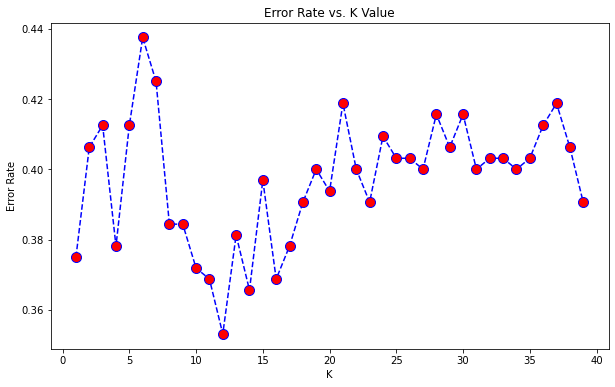

In [29]:
error_rate = []
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train1, y_train1)
    pred_i = knn.predict(X_test1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
#K=12 has minimum error rate
model = KNeighborsClassifier(n_neighbors= 12, metric = 'manhattan', p = 2,weights='uniform')
model.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [34]:
#Predicting the ouput from input data (x_train) and (y_train) 
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Accuracy score of train data set:",accuracy_score(y_train, y_pred1))
print("Accuracy score of test data set:",accuracy_score(y_test, y_pred2))

Accuracy score of train data set: 0.6419077404222049
Accuracy score of test data set: 0.60625


In [36]:
#After taking in factor as quality we will divide it in 2 types:0 and 1
#0 being Bad and 1 being Good
df['quality'] = np.where(df['quality']>6,1,0)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [40]:
#Assigning dataframe to list of array values
X = df.drop(['quality'], axis = 1).values
y = df['quality'].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
#Splitting the data in the proportion of 70:30 and 86:14
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                   test_size = 0.3,
                                                   random_state = 1111)

In [46]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.8979166666666667 Best K-Score 3


In [50]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    knn = XGBClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

[18:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_neighbors" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_neighbors" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[18:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_neighbors" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:34:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_neighbors" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

[18:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_neighbors" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy Score 0.9125 Best K-Score 1


In [56]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    randomforest = RandomForestClassifier(n_estimators = i)
    pipe_randomforest = Pipeline([('scale', MinMaxScaler()), ('randomforest', randomforest)])
    pipe_randomforest.fit(X_train, y_train)
    
    y_pred_train = pipe_randomforest.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_randomforest.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.9208333333333333 Best K-Score 31


In [57]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0
#Fitting the model
for i in k:
    bag = BaggingClassifier(n_estimators = i)
    pipe_bag = Pipeline([('scale', MinMaxScaler()), ('bagging', bag)])
    pipe_bag.fit(X_train, y_train)
    
    y_pred_train = pipe_bag.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_bag.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.91875 Best K-Score 9


In [73]:
linear = LinearRegression()
linear.fit(X_train1, y_train1)
linear_pred = linear.predict(X_test1)

In [79]:
#Results
print('Accuracy of Linear Regression on training set: {:.2f}'.format(linear.score(X_train1, y_train1)))
print('Accuracy of Linear Regression on test set: {:.2f}'.format(linear.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,linear_pred)
 
print(accuracy)
 
weights = linear.coef_
intercept = linear.intercept_
print(weights,intercept)

Accuracy of Linear Regression on training set: 0.23
Accuracy of Linear Regression on test set: 0.25
0.1430977462042151
[ 3.82374112e-02 -1.56432774e-01  6.79159299e-02  2.26777057e-02
 -5.74755365e-01  1.13422960e-04 -8.51000789e-04 -3.49187514e+01
  5.76051440e-03  2.84829031e-01  8.22339267e-02] 33.65383068038019


In [99]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(X_train1, y_train1)
logistic_pred = logistic.predict(X_test1)

#Results
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logistic.score(X_train1, y_train1)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logistic.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,logistic_pred)
 
print(accuracy)
 
weights = logistic.coef_
intercept = logistic.intercept_
print(weights,intercept)

Accuracy of Logistic Regression on training set: 0.88
Accuracy of Logistic Regression on test set: 0.87
0.18958333333333333
[[-0.03385069 -2.34795963  0.27726676  0.08188676 -1.13864617  0.02745517
  -0.02338396 -1.20928944 -2.61633149  1.55497453  0.91011971]] [-1.20029919]


In [98]:
svr = SVR()
svr.fit(X_train1, y_train1)
svr_pred = svr.predict(X_test1)

#Results
print('Accuracy of SVM Regression on training set: {:.2f}'.format(svr.score(X_train1, y_train1)))
print('Accuracy of SVM Regression on test set: {:.2f}'.format(svr.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,svr_pred)
 
print(accuracy)
 

Accuracy of SVM Regression on training set: -0.00
Accuracy of SVM Regression on test set: 0.00
0.11985419244695202


In [104]:
rforest = RandomForestRegressor(n_estimators=30)
rforest.fit(X_train1, y_train1)
rforest_pred = svr.predict(X_test1)

#Results
print('Accuracy of RandomForest Regression on training set: {:.2f}'.format(rforest.score(X_train1, y_train1)))
print('Accuracy of RandomForest Regression on test set: {:.2f}'.format(rforest.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,rforest_pred)
 
print(accuracy)
 

Accuracy of RandomForest Regression on training set: 0.91
Accuracy of RandomForest Regression on test set: 0.40
0.11985419244695202


In [132]:
adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=0.8)
adaboost.fit(X_train1, y_train1)
adaboost_pred = adaboost.predict(X_test1)

#Results
print('Accuracy of Adaboost Regression on training set: {:.2f}'.format(adaboost.score(X_train1, y_train1)))
print('Accuracy of Adaboost Regression on test set: {:.2f}'.format(adaboost.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,adaboost_pred)
 
print(accuracy)
 

Accuracy of Adaboost Regression on training set: 0.22
Accuracy of Adaboost Regression on test set: 0.23
0.15686921589951902


In [133]:
xgboost = XGBRegressor(n_estimators=120, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.5)
xgboost.fit(X_train1, y_train1)
xgboost_pred = xgboost.predict(X_test1)

#Results
print('Accuracy of XGboost Regression on training set: {:.2f}'.format(xgboost.score(X_train1, y_train1)))
print('Accuracy of XGboost Regression on test set: {:.2f}'.format(xgboost.score(X_test1, y_test1)))
accuracy = mean_squared_error(y_test,xgboost_pred)
 
print(accuracy)
 

Accuracy of XGboost Regression on training set: 0.98
Accuracy of XGboost Regression on test set: 0.40
0.1669956608553022


In [164]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate = 0.2, max_depth = 6, criterion = 'mse')
gbr.fit(X_train1, y_train1)
gbr_pred = gbr.predict(X_test1)

print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))
accuracy = mean_squared_error(y_test,gbr_pred)
print(accuracy)

0.820114100513384
0.8007217224802109
0.20224071928701695
